**Gold Price Prediction system**

**Importing all the dependencies**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics 


**Data preprocessing**

In [2]:
#Loading the data 

path = 'gld_price_data.csv'
data = pd.read_csv(path)

In [3]:
#Viewing the first 3 rows of the dataset 

data.head(3)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492


In [4]:
#Viewing the Last 3 rows of the dataset 

data.tail(3)

,Date,SPX,GLD,USO,SLV,EUR/USD
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
data.shape # checking the size of the dataset 

(2290, 6)

In [6]:
data.isnull().sum() # Chrcking for null values 

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
data.describe() # getting the statiscal information about the dataset 

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


**Data Visualization**

**Correlation**  
positive  
Negative


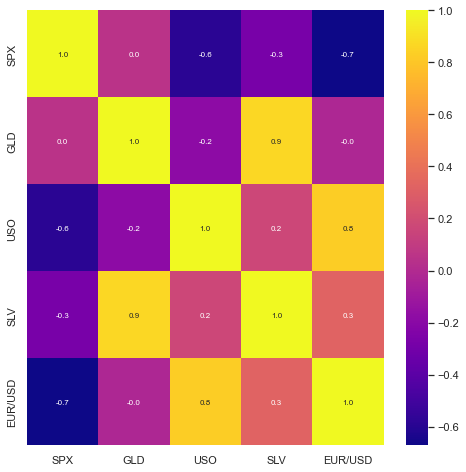

In [8]:
correlation = data.corr() # setting a correlation object 
sns.set()
plt.figure(1,figsize=(8,8))
sns.heatmap(correlation, annot=True,annot_kws={'size':8},fmt='.1f', cbar=True, cmap= 'plasma')
plt.show(' ')

In [9]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Windows 10 Pro\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


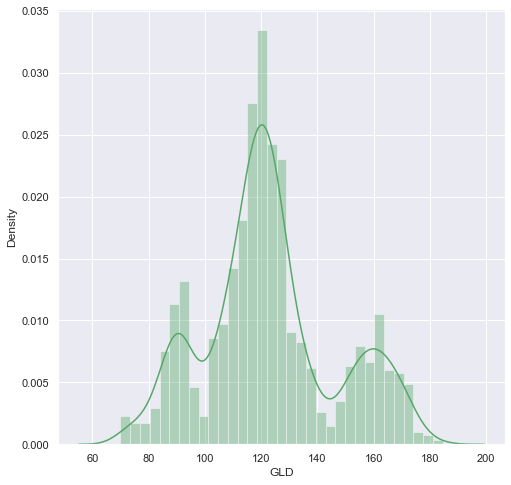

In [10]:
plt.figure(2,figsize=(8,8))
sns.distplot(data['GLD'],color='g')
plt.show(' ')

C:\Users\Windows 10 Pro\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


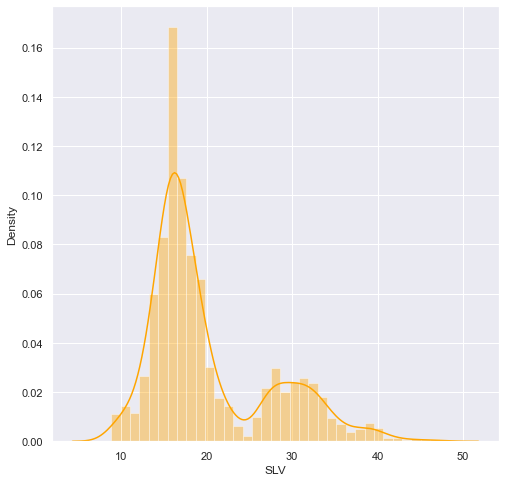

In [11]:
plt.figure(3,figsize=(8,8))
sns.distplot(data['SLV'],color='orange')
plt.show(' ')

**Splitting the data for training and testing**


In [12]:
# Dropping the GLD and Date column and saving it to the variable name features

features = data.drop(['GLD','Date'],axis = 1)
target = data['GLD']

In [13]:
# Splitting inot train and test 

Xtrain,Xtest,Ytrain,Ytest = train_test_split(features,target,test_size=0.2,random_state=2)

In [14]:
# checking the size of the splitted data

print(features.shape,Xtrain.shape,Xtest.shape)

(2290, 4) (1832, 4) (458, 4)


In [15]:
print(target.shape,Ytrain.shape,Ytest.shape)

(2290,) (1832,) (458,)


**Model Building**

In [16]:
# Creating a randonforestregressor object 

Model = RandomForestRegressor()

#Fitting the data inot the model 

Model.fit(Xtrain,Ytrain)

RandomForestRegressor()

**Model Evaluation**

In [17]:
Training_prediction = Model.predict(Xtrain)
Training_Error = metrics.r2_score(Training_prediction,Ytrain)
print("The training error is :",Training_Error)

The training error is : 0.99840977934696


In [18]:
Testing_prediction = Model.predict(Xtest)
Testing_Error = metrics.r2_score(Testing_prediction,Ytest)
print("The testing error is :",Testing_Error)

The testing error is : 0.9887822510874492


**Visualizing the prediction and the actual values**

In [19]:
# checking the type of data

print(type(Ytrain))
print(type(Training_prediction))
print(type(Xtest))
print(type(Testing_prediction))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [20]:
# Converting into a list 

ytrain = list(Ytrain)
ytest = list(Ytest)
training_prediction = list(Training_prediction)
testing_prediction = list(Testing_prediction)

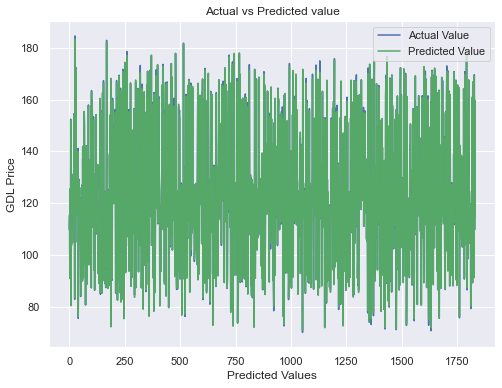

In [21]:
# Plotting 

plt.figure(4,figsize=(8,6))
plt.plot(ytrain,color='b',label='Actual Value')
plt.plot(Training_prediction,color='g',label='Predicted Value')
plt.title('Actual vs Predicted value')
plt.xlabel('Predicted Values')
plt.ylabel('GDL Price')
plt.legend()
plt.show(' ')

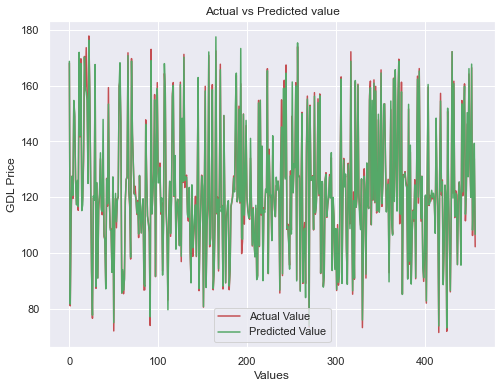

In [22]:
plt.figure(5,figsize=(8,6))
plt.plot(ytest,color='r',label='Actual Value')
plt.plot(Testing_prediction,color='g',label='Predicted Value')
plt.title('Actual vs Predicted value')
plt.xlabel('Values')
plt.ylabel('GDL Price')
plt.legend()
plt.show(' ')

**Thank You!**  
**Olatunde** 